In [78]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
%matplotlib inline

import random

In [79]:
# 加载数据

mnist_train = torchvision.datasets.FashionMNIST(root='~/dataset/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/dataset/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

In [80]:
batch_size=256
num_workers=0
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [81]:
feature,label = mnist_test[5]
feature.shape, label

(torch.Size([1, 28, 28]), 1)

In [82]:
for X,y in train_iter:
    print(X,y)
    break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.1020, 0.0000,  ..., 0.1059, 0.2824, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [2]:
# 读取数据
def load_minst_iter(batch_size):
    mnist_train = torchvision.datasets.FashionMNIST(root='~/Dataset/FashionMnist',train=True, download=True,transform=transforms.ToTensor())
    mnist_test = torchvision.datasets.FashionMNIST(root='~/Dataset/FashionMnit', train=False, download=True,transform=transforms.ToTensor())
    train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)
    test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True, num_workers=0)
    return train_iter, test_iter

In [3]:
# 图片显示
def show_mnist_fashion(image,label):
    _, fig = plt.subplots(1, len(image), figsize=(12,12))
    for p, img, lab  in zip(fig, image, label):
        p.imshow(img.view((28,28)).numpy())
        p.set_title(lab)
        p.axes.get_xaxis().set_visible(False)
        p.axes.get_yaxis().set_visible(False)
    plt.show()

In [83]:
# 获取数据
batch_size=256
train_iter,test_iter = load_minst_iter(batch_size)

In [5]:
# 初始化模型参数
num_inputs = 28*28
num_outputs = 10

In [51]:
w = torch.normal(0, 0.01, (num_inputs,num_outputs), dtype=torch.float32, requires_grad=True)
b = torch.zeros((num_outputs,), dtype=torch.float32, requires_grad=True)

In [14]:
# test
x  =torch.tensor([[1,12,3],
                  [4,5,6]])
x.sum(dim=1,keepdim=True)

tensor([[16],
        [15]])

In [84]:
# 将输出转换为概率 ，用于交叉熵计算（即每行之和为1的，这样概率最大的就是最后结果）
def softmax(X):
    x_exp = X.exp()
    parttiton = X.exp().sum(dim=1, keepdim=True)
    return x_exp / parttiton

In [31]:
test_x = torch.rand((5,4),dtype=torch.float32)
test_x.dtype,test_x

(torch.float32,
 tensor([[0.1531, 0.8498, 0.2085, 0.9560],
         [0.7365, 0.2002, 0.1876, 0.3164],
         [0.8608, 0.2475, 0.8811, 0.9252],
         [0.4035, 0.5645, 0.4614, 0.4490],
         [0.1063, 0.1919, 0.3056, 0.4397]]))

In [32]:
test_y = softmax(test_x)
test_y,test_y.sum(dim=1)

(tensor([[0.1588, 0.3188, 0.1679, 0.3545],
         [0.3547, 0.2075, 0.2049, 0.2330],
         [0.2756, 0.1492, 0.2812, 0.2939],
         [0.2336, 0.2744, 0.2475, 0.2445],
         [0.2125, 0.2315, 0.2594, 0.2966]]),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000]))

In [30]:
# 定义模型
def net(X,w,b):
    input = X.view(-1,num_inputs)
    return softmax( torch.mm(input, w) + b )

In [76]:
# 定义交叉熵损失函数
# 这里和交叉熵的公式区别在于：这里用gather函数之选了 y对应的y_hat概率值
def cross_entropy(y_hat, y):
    y_hat = softmax(y_hat)
    return -torch.log(y_hat.gather(1,y.view(-1,1)))  # gather 收集输入的特定维度指定位置的数值

In [10]:
# 计算准确率
def accuracy(y_hat, y):
    return (y.hat.argmax(dim=1)==y).float().mean().item()    # 也可以写成 ( (y_hat.argmax(dim=1) == y).sum() / len(y) ).item()

In [85]:
test_y_hat = torch.tensor([[0.1, 0.3, 0.8],
                           [0.5, 0.8, 0.4]])
test_y = torch.tensor([2,2])
test_y = softmax(test_y)

RuntimeError: exp_vml_cpu not implemented for 'Long'

In [33]:
test_y_hat = torch.tensor([[0.1, 0.3, 0.8],
                           [0.5, 0.8, 0.4]])
test_y = torch.tensor([2,2])
kk = test_y_hat.argmax(dim=1) == test_y
print(kk)
print( (kk.sum()/len(test_y)).item() )

tensor([ True, False])
0.5


In [52]:
# 定义模型 在数据集上的准确率
def evaluate_accuracy(data_iter, net):
    acc_num, n = 0.0, 0
    for X, y in data_iter:
        acc_num += (net(X,w,b).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
        return acc_num / n

In [59]:
train_iter, test_iter = load_minst_iter(256)
print(evaluate_accuracy(train_iter, net))

0.0859375


In [60]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [61]:
# 训练模型
def train_ch3(model, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_loss_sum, train_acc_sum ,n= 0.0, 0.0, 0
        for X,y in train_iter:
            y_hat = model(X, w, b)
            l = loss(y_hat, y).sum()
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
   

            l.backward()
            
            if optimizer is not None:
                optimizer.step()
            else:
                sgd(params, lr, batch_size)
            
            train_loss_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1)==y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter,model)
        print('num_epochs %d, loss %.4f, train acc %.3f, test acc %.3f'% (epoch + 1, train_loss_sum / n, train_acc_sum / n, test_acc))
                
                
            

In [62]:
model=net
num_epochs=10
lr = 0.03
batch_size=256
loss=cross_entropy
train_ch3(model, train_iter, test_iter, loss, num_epochs, batch_size, [w, b], lr)

num_epochs 1, loss 1.0325, train acc 0.695, test acc 0.742
num_epochs 2, loss 0.7082, train acc 0.777, test acc 0.719
num_epochs 3, loss 0.6366, train acc 0.798, test acc 0.805
num_epochs 4, loss 0.5975, train acc 0.809, test acc 0.777
num_epochs 5, loss 0.5716, train acc 0.816, test acc 0.797
num_epochs 6, loss 0.5531, train acc 0.820, test acc 0.809
num_epochs 7, loss 0.5387, train acc 0.824, test acc 0.766
num_epochs 8, loss 0.5270, train acc 0.828, test acc 0.816
num_epochs 9, loss 0.5176, train acc 0.830, test acc 0.820
num_epochs 10, loss 0.5096, train acc 0.832, test acc 0.844


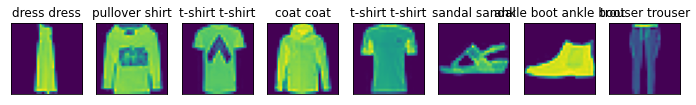

In [75]:
# 预测
test_labels =  ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
X, y = iter(test_iter).next()

true_lable = [test_labels[i] for i in y]
pred_lable = [test_labels[i] for i in net(X,w,b).argmax(dim=1).numpy()]
titles = [true +' ' + pred for true, pred in zip(true_lable, pred_lable)]
show_mnist_fashion(X[0:8],titles[0:8])